Este programa se va a encargar de buscar **TODAS** las **dependencias de una noticia determinada con el resto de noticias** de la base de datos.

Primero, se va a **medir la NCD de la noticia buscada con el resto de noticias** que se han recopilado. Mientras tanto, se va a ir **formando la matriz de distancias** con las distancias calculadas para poder **representar el clustering** de dependencias.

Antes de poder realizar este estudio, he tenido que **recopilar un conjunto de noticias** accediendo a los RSS de diferentes periódicos y guardando los enlaces de las noticias. Después, hay que parsear cada noticia guardando su contenido en una base de datos. Esto, lo he realizado en el jupyter notebook llamado **extraccion_de_datos** y los resultados que vamos a utilizar en este programa son los siguientes:

- Un fichero **noticias.json donde están almacenadas las noticias de cada periódico**.
- Obtengo un fichero **urls.json donde están almacenadas todas las urls de las noticias recopiladas**.

Empiezo a programar:

Empiezo indicando la noticia que quiero buscar. Para elegir la noticia que quiero buscar tengo que **indicar el periódico y el número de la noticia**:

In [3]:
periodico_buscado = 'EL MUNDO'
num_noticia_buscada = '1'

Busco la noticia buscada entre mis datos y **muestro todos los datos que tengo de ella**:

In [4]:
# Librerias utilizadas
import json
import os

# Guardo en una variable todas las noticias del periodico buscado que he obtenido
noticias_periodico_buscado = {}
url_noticias_periodico_buscado = 'Noticias/' + periodico_buscado + '/noticias.json'
with open(url_noticias_periodico_buscado) as file:
    noticias_periodico_buscado = json.load(file)

# Muestro los datos de la noticia que voy a buscar
print("Información de la noticia buscada:")
print("Pertenece al periódico " + periodico_buscado)
print("URL: " + noticias_periodico_buscado[num_noticia_buscada]['url'])
print("Título: " + noticias_periodico_buscado[num_noticia_buscada]['titulo'])
print("Autor: " + noticias_periodico_buscado[num_noticia_buscada]['autor'])
print("Fecha: " + noticias_periodico_buscado[num_noticia_buscada]['fecha'])
print("Contenido:")
print(noticias_periodico_buscado[num_noticia_buscada]['contenido'])

Información de la noticia buscada:
Pertenece al periódico EL MUNDO
URL: https://www.elmundo.es/espana/2022/04/02/62475d4ae4d4d8295b8b45b1.html
Título: Feijóo hace tándem con Juanma Moreno y dará "aún más peso" a Andalucía en el PP | España
Autor: JUANMA LAMET
Fecha: 2022-04-02T06:16:23Z
Contenido:
El lunes, Elías Bendodo viajó a Galicia a verse en secreto con Alberto Núñez Feijóo. Sólo un puñado de personas conoció ese viaje, que estuvo envuelto, como todo lo que rodea al líder gallego, en un manto de secretismo. «Las formas son las garantías de las cosas», suele decir Feijóo, y en su caso la garantía de las formas es el hermetismo. En la discreción de ese viaje se fraguó la designación de Bendodo como coordinador general y número tres del PP.Pero ése no será el único nombramiento andaluz del nuevo PP, según revelan a este diario fuentes populares: «Andalucía tendrá más peso aún en la cúpula». Lo cierto es que la primera conclusión del XX congreso del PP es que Andalucía y Galicia form

Ha llegado el momento de **calcular las NCD de la noticia buscada con el resto de noticias recopiladas**. Para ello, primero tengo que extraer las noticias de todos los periódicos incluído el periódico del cual estoy buscando la noticia:

In [5]:
# Librerias utilizadas
import json
import os

# Guardo las noticias recopiladas de cada periodico en una variable diferente

# EL MUNDO
noticias_periodico_ELMUNDO = {}
url_noticias_periodico_ELMUNDO = 'Noticias/EL MUNDO/noticias.json'
with open(url_noticias_periodico_ELMUNDO) as file:
    noticias_periodico_ELMUNDO = json.load(file)
    
# 20 minutos
noticias_periodico_20minutos = {}
url_noticias_periodico_20minutos = 'Noticias/20 minutos/noticias.json'
with open(url_noticias_periodico_20minutos) as file:
    noticias_periodico_20minutos = json.load(file)
    
# elEconomista.es
noticias_periodico_elEconomistaes = {}
url_noticias_periodico_elEconomistaes = 'Noticias/elEconomista.es/noticias.json'
with open(url_noticias_periodico_elEconomistaes) as file:
    noticias_periodico_elEconomistaes = json.load(file)
    
# La Informacion
noticias_periodico_LaInformacion = {}
url_noticias_periodico_LaInformacion = 'Noticias/La Informacion/noticias.json'
with open(url_noticias_periodico_LaInformacion) as file:
    noticias_periodico_LaInformacion = json.load(file)
    
# El Confidencial
noticias_periodico_ElConfidencial = {}
url_noticias_periodico_ElConfidencial = 'Noticias/El Confidencial/noticias.json'
with open(url_noticias_periodico_ElConfidencial) as file:
    noticias_periodico_ElConfidencial = json.load(file)

Muestro un resumen del número de noticias recopiladas:

In [6]:
print("De cada periódico muestro el número de noticias recopiladas:")
print("EL MUNDO: " + str(len(noticias_periodico_ELMUNDO)))
print("20 minutos: " + str(len(noticias_periodico_20minutos)))
print("elEconomista.es: " + str(len(noticias_periodico_elEconomistaes)))
print("La Información: " + str(len(noticias_periodico_LaInformacion)))
print("El Confidencial: " + str(len(noticias_periodico_ElConfidencial)))

De cada periódico muestro el número de noticias recopiladas:
EL MUNDO: 1137
20 minutos: 89
elEconomista.es: 45
La Información: 49
El Confidencial: 251


Calculo las NCD y formo la **matriz de distancias, que tendrá la siguiente forma**:

In [7]:
# Libreria utilizada para formar la matriz
import numpy as np

x=3 # Distancia NCD entre la noticia buscada y otra noticia
matriz_sin_numpy = [[0,x,x,x],[x,0,1,1],[x,1,0,1],[x,1,1,0]]
matriz = np.array(matriz_sin_numpy)
print(matriz)

[[0 3 3 3]
 [3 0 1 1]
 [3 1 0 1]
 [3 1 1 0]]


La matriz de arriba sería la matriz formada al comparar la noticia buscada con 3 noticias diferentes. El valor **0 significa que es idéntica** y **1 que no tiene nada que ver**. El 1 se pone para que el **clustering solo tenga en cuenta las distancias entre la noticia buscada y el resto**. En el ejemplo, se supone que todas tienen distancia x con la noticia buscada.

**Calculo las distancias** de la noticia buscada con el resto de noticias (menos con ella misma) y **formo la matriz de distancias**:

In [8]:
from ipynb.fs.full.NCD import NCD # Funcion para calcular la NCD
from ipynb.fs.full.NCD import write_file_str # Funcion para escribir el contenido de una noticia a un fichero txt

# Escribo el contenido de la noticia buscada en un fichero txt para compararla con las otras noticias
filename_noticia_buscada = "noticia_buscada.txt" # Fichero txt para escribir el contenido de la noticia buscada en el
longitud_busqueda = len(noticias_periodico_buscado[num_noticia_buscada]['contenido']) # Tamaño noticia buscada
nombre_noticia_buscada = periodico_buscado + "-" + num_noticia_buscada

# Compruebo que la noticia buscada no se demasiado corta
indicador_noticia_demasiado_corta = 0
if longitud_busqueda < 1250:
    print("La noticia buscada es demasiado corta como para buscarla.")
    indicador_noticia_demasiado_corta += 1

# Escribo el contenido en un fichero
write_file_str(filename_noticia_buscada, noticias_periodico_buscado[num_noticia_buscada]['contenido']) 

filename_noticia_comparada = "noticia_comparada.txt" # Fichero txt para escribir el contenido de la noticia que voy a comparar

dicc_periodico_noticias = {} # Diccionario para almacenar las noticias de cada periodico
dicc_periodico_noticias['EL MUNDO'] = noticias_periodico_ELMUNDO
dicc_periodico_noticias['20 minutos'] = noticias_periodico_20minutos
dicc_periodico_noticias['elEconomista.es'] = noticias_periodico_elEconomistaes
dicc_periodico_noticias['La Informacion'] = noticias_periodico_LaInformacion
dicc_periodico_noticias['El Confidencial'] = noticias_periodico_ElConfidencial


# Variables para hacer un estudio de las noticias que finalmente se han comparado
dicc_periodico_num_noticias = {} # Se va a almacenar para cada periodico el numero de noticias comparadas con la buscada
dicc_periodico_num_noticias['EL MUNDO'] = 0
dicc_periodico_num_noticias['20 minutos'] = 0
dicc_periodico_num_noticias['elEconomista.es'] = 0
dicc_periodico_num_noticias['La Informacion'] = 0
dicc_periodico_num_noticias['El Confidencial'] = 0

matriz_NCDs = {} # Diccionario donde voy a ir guardando los valores de las distancias calculadas
contador_dependencias = 0 # Cuenta el numero de noticias que son parecidas a la noticia buscada

# Recorro para cada periodico todas las noticias
for periodico in dicc_periodico_noticias:
    for noticia in dicc_periodico_noticias[periodico]:
        # Comparo la noticia con la noticia buscada (solo si no es la misma)
        if periodico != periodico_buscado or noticia != num_noticia_buscada:
            print("Comparando la noticia " + noticia + " del periodico " + periodico + " y la noticia " + num_noticia_buscada + " del periodico " + periodico_buscado)
            
            longitud_comparada = len(dicc_periodico_noticias[periodico][noticia]['contenido']) # Tamaño noticia comparada
            
            # Solo comparo la noticia si su contenido no esta vacio y si tiene una longitud mayor de 1250
            if dicc_periodico_noticias[periodico][noticia]['contenido'] != "" and longitud_comparada >= 1250:
                # Ademas tiene que tener una longitud parecida con la noticia buscada
                if longitud_busqueda + 1000 >= longitud_comparada and longitud_busqueda - 1000 <= longitud_comparada:
                    
                    dicc_periodico_num_noticias[periodico] += 1 # Cuento las noticias comparadas en este periodico
                    nombre_noticia_comparada = periodico + "-" + noticia
                    
                    # Escribo el contenido de la noticia comparada en un fichero txt para compararla con la noticia buscada
                    write_file_str(filename_noticia_comparada, dicc_periodico_noticias[periodico][noticia]['contenido']) 
                    
                    # Calculo las distancias de compresion normalizadas: NCD(noticia_buscada, noticia_comparada) y NCD(noticia_comparada, noticia_buscada)
                    NCDs = NCD(filename_noticia_buscada, filename_noticia_comparada)
                    
                    # Quiero de alguna manera identificar las noticias con mas similitud a otras y las que menos
                    # Para ello voy a contar las veces que:
                    # n1 --> n2 < 0,765 y n2 --> n1 < 0,8
                    # o
                    # n2 --> n1 < 0,765 y n1 --> n2 < 0,8
                    # o
                    # n2 --> n1 < 0,765 y n1 --> n2 < 0,765
                    # Es decir, al menos una de las distancias debe ser < 0,765 y la otra < 0,8
                    if ((NCDs[0] < 0.765 and NCDs[1] < 0.8) or (NCDs[1] < 0.765 and NCDs[0] < 0.8)):
                        contador_dependencias += 1 # Aumento el valor de noticias similares encontradas
                    
                    # Guardo los resultados en la matriz de distancias

                    # noticia_buscada - noticia_comparada
                    if nombre_noticia_buscada not in matriz_NCDs:
                        matriz_NCDs[nombre_noticia_buscada] = {}
                        matriz_NCDs[nombre_noticia_buscada][nombre_noticia_comparada] = NCDs[0]
                    else:
                        matriz_NCDs[nombre_noticia_buscada][nombre_noticia_comparada] = NCDs[0]

                    # noticia_comparada - noticia_buscada
                    if nombre_noticia_comparada not in matriz_NCDs:
                        matriz_NCDs[nombre_noticia_comparada] = {}
                        matriz_NCDs[nombre_noticia_comparada][nombre_noticia_buscada] = NCDs[1]
                    else:
                        matriz_NCDs[nombre_noticia_comparada][nombre_noticia_buscada] = NCDs[1]

print(matriz_NCDs)

Comparando la noticia 7 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 10 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 13 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 15 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 16 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 17 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 19 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 20 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 21 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 22 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 24 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 25 del periodico EL MUNDO y la no

Comparando la noticia 168 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 170 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 171 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 172 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 173 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 174 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 175 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 176 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 177 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 178 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 179 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 180 del periodico EL 

Comparando la noticia 290 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 291 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 292 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 293 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 294 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 295 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 296 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 297 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 301 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 302 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 303 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 304 del periodico EL 

Comparando la noticia 395 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 396 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 398 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 399 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 400 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 401 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 402 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 403 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 404 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 405 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 406 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 407 del periodico EL 

Comparando la noticia 512 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 513 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 514 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 515 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 516 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 517 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 518 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 519 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 520 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 521 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 522 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 523 del periodico EL 

Comparando la noticia 626 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 627 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 628 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 629 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 630 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 631 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 632 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 633 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 634 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 635 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 636 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 637 del periodico EL 

Comparando la noticia 764 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 765 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 766 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 767 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 768 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 769 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 770 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 772 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 775 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 776 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 777 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 778 del periodico EL 

Comparando la noticia 913 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 915 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 916 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 918 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 919 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 921 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 922 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 923 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 924 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 925 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 926 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 927 del periodico EL 

Comparando la noticia 1050 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1051 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1052 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1053 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1054 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1055 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1056 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1057 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1058 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1059 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1060 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1061 del p

Comparando la noticia 1252 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1253 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1254 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1255 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1256 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1257 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1258 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1259 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1260 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1261 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1262 del periodico EL MUNDO y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1263 del p

Comparando la noticia 89 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 90 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 91 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 92 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 93 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 94 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 95 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 96 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 97 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 98 del periodico 20 minutos y la noticia 1 del periodico EL MUNDO
Comparando la noticia 1 del periodico elEconomista.es y la noticia 1 del periodico EL MUNDO
Comparando la noticia 2 del 

Comparando la noticia 28 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 29 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 30 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 31 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 32 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 33 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 34 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 35 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 36 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 37 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 38 del periodico El Confidencial y la noticia 1 

Comparando la noticia 157 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 158 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 159 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 160 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 161 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 162 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 163 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 164 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 165 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 166 del periodico El Confidencial y la noticia 1 del periodico EL MUNDO
Comparando la noticia 167 del periodico El Confidencial y la

Tras realizar algunas pruebas, se vió que no era posible **representar todas las NCD calculadas en una sola matriz ya que no era legible el clustering**. Por ello, decidí representar estas distancias en **matrices de distancia de 50 x 50**.

**¡IMPORTANTE!** Esto no valdría como solución en el caso de tener que comparar todos los pares de noticias ya que en el dendograma no se vería la relación de todas las noticias con todas. En este caso, sí es posible porque se está comparando una noticia con el resto, por lo que es suficiente con que esté siempre la noticia buscada en el dendograma para que sea representativo lo que se ha calculado.

In [9]:
import math

# Calculo el numero de noticias que se han comparado
numero_noticias_comparadas = len(matriz_NCDs[nombre_noticia_buscada])
print("La noticia buscada se ha comparado con " + str(numero_noticias_comparadas) + " noticias")
numero_matrices_distancia = numero_noticias_comparadas / 50
print("Se van a crear " + str(math.ceil(numero_matrices_distancia)) + " matrices de distancia.")

# Creo las matrices de distancia de 50x50 que sean necesarias

list_matrices = [] # lista de matrices

# Es necesario guardar las posiciones porque en el dendograma final aparecen numeradas las noticias segun
# su posicion en la matriz, pero no se puede identificar la noticia que es
list_posiciones = [] # lista de posiciones en cada matriz

contador_noticias_comparadas_matriz = 0 # Indica el numero de noticias comparadas que ya han sido añadidas en matrices

for numero_matriz in range(0,math.ceil(numero_matrices_distancia)):
    print("Creando la matriz numero : " + str(numero_matriz))
    
    matriz_distancias_noticia_buscada_sin_numpy = [] # Estrutura para crear la matriz de distancias

    # Contenido inicial de cada fila de la matriz, tiene 50 (noticia_buscada + 49 noticias_comparadas) columnas
    # Primero pongo todo a 1
    for fila in range(0, 50):
        list_aux = []
        for columna in range(0, 50):  
            list_aux.append(1)
        matriz_distancias_noticia_buscada_sin_numpy.append(list_aux)
    
    # Guarda la posicion de cada noticia en la matriz
    posicion_noticia_matriz = [nombre_noticia_buscada] # la primera siempre es la noticia_buscada 

    # Guardo la posicion de cada noticia en la matriz
    aux_contador_noticias_comparadas_matriz = contador_noticias_comparadas_matriz
    limite = contador_noticias_comparadas_matriz + 49 # Indica hasta que noticia_comparada tengo que leer
    cont = 1
    for nombre_noticia_comparada in matriz_NCDs[nombre_noticia_buscada]:
        if cont > limite:
            break
        if cont > contador_noticias_comparadas_matriz:
            posicion_noticia_matriz.append(nombre_noticia_comparada)
            contador_noticias_comparadas_matriz += 1
        cont += 1

    # Relleno con ceros la diagonal de la matriz ya que una noticia y la misma, son iguales
    cont_fila = 0
    for fila in matriz_distancias_noticia_buscada_sin_numpy:
        fila[cont_fila] = 0
        cont_fila += 1

    # Relleno con las distancias calculadas

    # Primero noticia_buscada --> noticia_comparada
    cont_columna = 1
    cont = 1
    for nombre_noticia_comparada in matriz_NCDs[nombre_noticia_buscada]:
        if cont > limite:
            break
        if cont > aux_contador_noticias_comparadas_matriz:
            matriz_distancias_noticia_buscada_sin_numpy[0][cont_columna] = matriz_NCDs[nombre_noticia_buscada][nombre_noticia_comparada]
            cont_columna += 1
        cont += 1

    # Segundo noticia_comparada --> noticia_buscada
    cont_fila = 1
    cont = 1
    for nombre_noticia_comparada in matriz_NCDs[nombre_noticia_buscada]:
        if cont > limite:
            break
        if cont > aux_contador_noticias_comparadas_matriz:
            matriz_distancias_noticia_buscada_sin_numpy[cont_fila][0] = matriz_NCDs[nombre_noticia_comparada][nombre_noticia_buscada]
            cont_fila += 1
        cont += 1

    # Imprimo la matriz formada
    print("Número de noticias_comparadas + una noticia_buscada = " + str(len(matriz_distancias_noticia_buscada_sin_numpy)))
    matriz_distancias_noticia_buscada = np.array(matriz_distancias_noticia_buscada_sin_numpy)
    print("Matriz de distancias:")
    print(matriz_distancias_noticia_buscada)
    print("Posiciones de las noticias:")
    print(posicion_noticia_matriz)
    
    # Guardo la matriz y las posiciones
    list_matrices.append(matriz_distancias_noticia_buscada)
    list_posiciones.append(posicion_noticia_matriz)

La noticia buscada se ha comparado con 256 noticias
Se van a crear 6 matrices de distancia.
Creando la matriz numero : 0
Número de noticias_comparadas + una noticia_buscada = 50
Matriz de distancias:
[[0.         0.9005102  0.9246824  ... 0.89637058 0.89644304 0.89675768]
 [0.91894774 0.         1.         ... 1.         1.         1.        ]
 [0.91219339 1.         0.         ... 1.         1.         1.        ]
 ...
 [0.91006043 1.         1.         ... 0.         1.         1.        ]
 [0.9161038  1.         1.         ... 1.         0.         1.        ]
 [0.91077142 1.         1.         ... 1.         1.         0.        ]]
Posiciones de las noticias:
['EL MUNDO-1', 'EL MUNDO-7', 'EL MUNDO-13', 'EL MUNDO-16', 'EL MUNDO-17', 'EL MUNDO-19', 'EL MUNDO-22', 'EL MUNDO-24', 'EL MUNDO-25', 'EL MUNDO-28', 'EL MUNDO-30', 'EL MUNDO-31', 'EL MUNDO-36', 'EL MUNDO-41', 'EL MUNDO-42', 'EL MUNDO-46', 'EL MUNDO-59', 'EL MUNDO-60', 'EL MUNDO-61', 'EL MUNDO-62', 'EL MUNDO-77', 'EL MUNDO-82',

**Resumen de las noticias comparadas con la noticia buscada**:

In [10]:
print("La noticia buscada se ha comparado con:")
num_noticias_comparadas = 0 # Recuento de las noticias comparadas
for periodico in dicc_periodico_num_noticias: 
    print("Del periodico " + periodico + " con " + str(dicc_periodico_num_noticias[periodico]) + " noticias.")
    num_noticias_comparadas += dicc_periodico_num_noticias[periodico]
    
print("Numero total de noticias comparadas: " + str(num_noticias_comparadas))
print("Tiene un total de " + str(contador_dependencias) + " dependencias con otras noticias.")

La noticia buscada se ha comparado con:
Del periodico EL MUNDO con 176 noticias.
Del periodico 20 minutos con 6 noticias.
Del periodico elEconomista.es con 8 noticias.
Del periodico La Informacion con 14 noticias.
Del periodico El Confidencial con 52 noticias.
Numero total de noticias comparadas: 256
Tiene un total de 2 dependencias con otras noticias.


Siguiente y último paso, **representar las distancias calculadas en forma de clustering** para ver gráficamente las dependencias que tiene la noticia buscada:

Cluster de la matriz número 0
0: EL MUNDO-1
1: EL MUNDO-7
2: EL MUNDO-13
3: EL MUNDO-16
4: EL MUNDO-17
5: EL MUNDO-19
6: EL MUNDO-22
7: EL MUNDO-24
8: EL MUNDO-25
9: EL MUNDO-28
10: EL MUNDO-30
11: EL MUNDO-31
12: EL MUNDO-36
13: EL MUNDO-41
14: EL MUNDO-42
15: EL MUNDO-46
16: EL MUNDO-59
17: EL MUNDO-60
18: EL MUNDO-61
19: EL MUNDO-62
20: EL MUNDO-77
21: EL MUNDO-82
22: EL MUNDO-86
23: EL MUNDO-88
24: EL MUNDO-92
25: EL MUNDO-123
26: EL MUNDO-145
27: EL MUNDO-155
28: EL MUNDO-156
29: EL MUNDO-164
30: EL MUNDO-167
31: EL MUNDO-171
32: EL MUNDO-172
33: EL MUNDO-173
34: EL MUNDO-175
35: EL MUNDO-181
36: EL MUNDO-189
37: EL MUNDO-191
38: EL MUNDO-192
39: EL MUNDO-203
40: EL MUNDO-213
41: EL MUNDO-272
42: EL MUNDO-289
43: EL MUNDO-331
44: EL MUNDO-351
45: EL MUNDO-354
46: EL MUNDO-394
47: EL MUNDO-396
48: EL MUNDO-402
49: EL MUNDO-409

Cluster de la matriz número 1
0: EL MUNDO-1
1: EL MUNDO-429
2: EL MUNDO-433
3: EL MUNDO-437
4: EL MUNDO-439
5: EL MUNDO-451
6: EL MUNDO-453
7: EL MUNDO-454


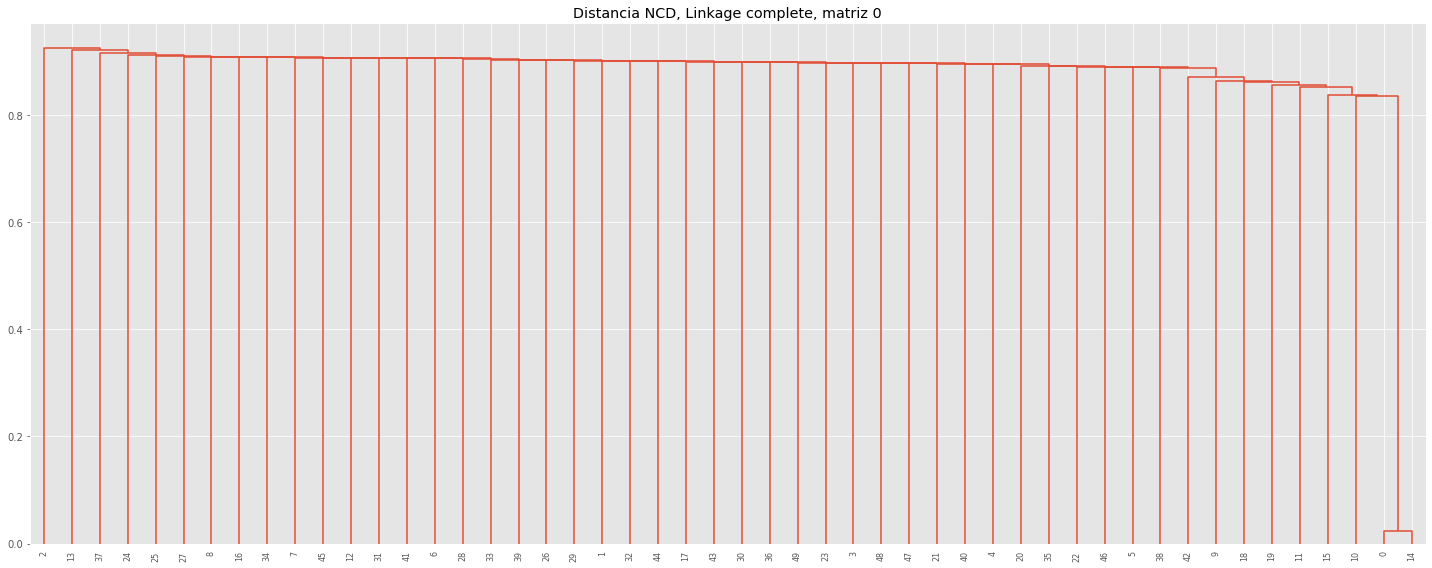

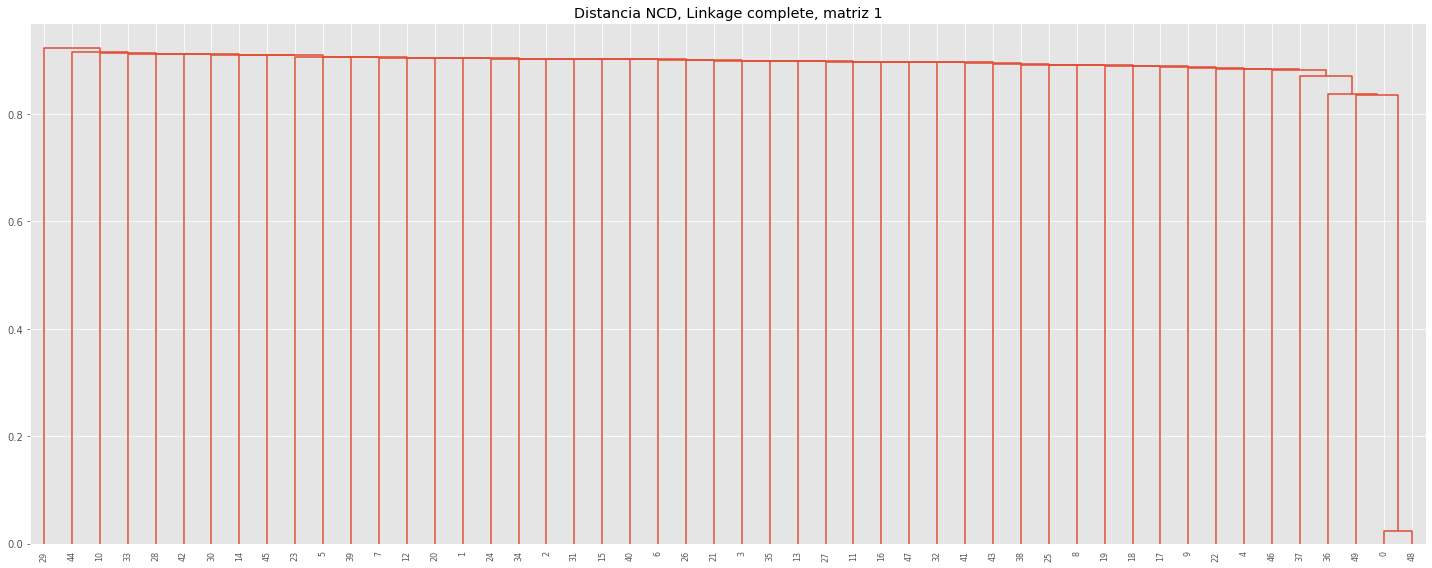

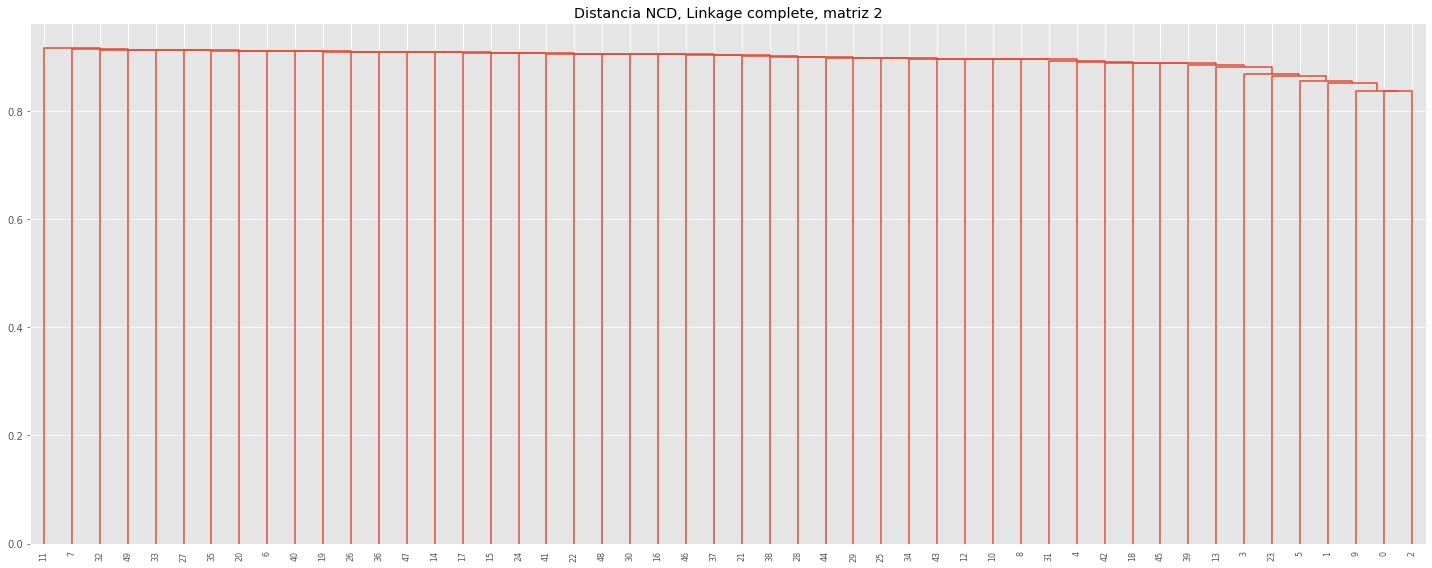

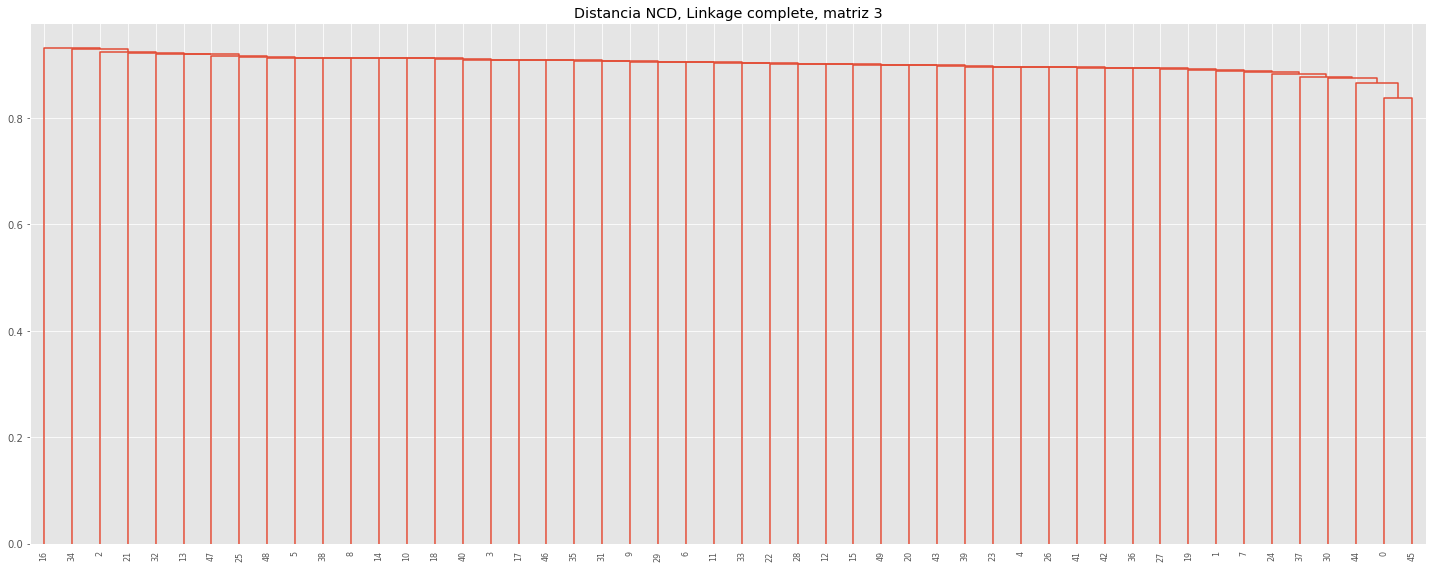

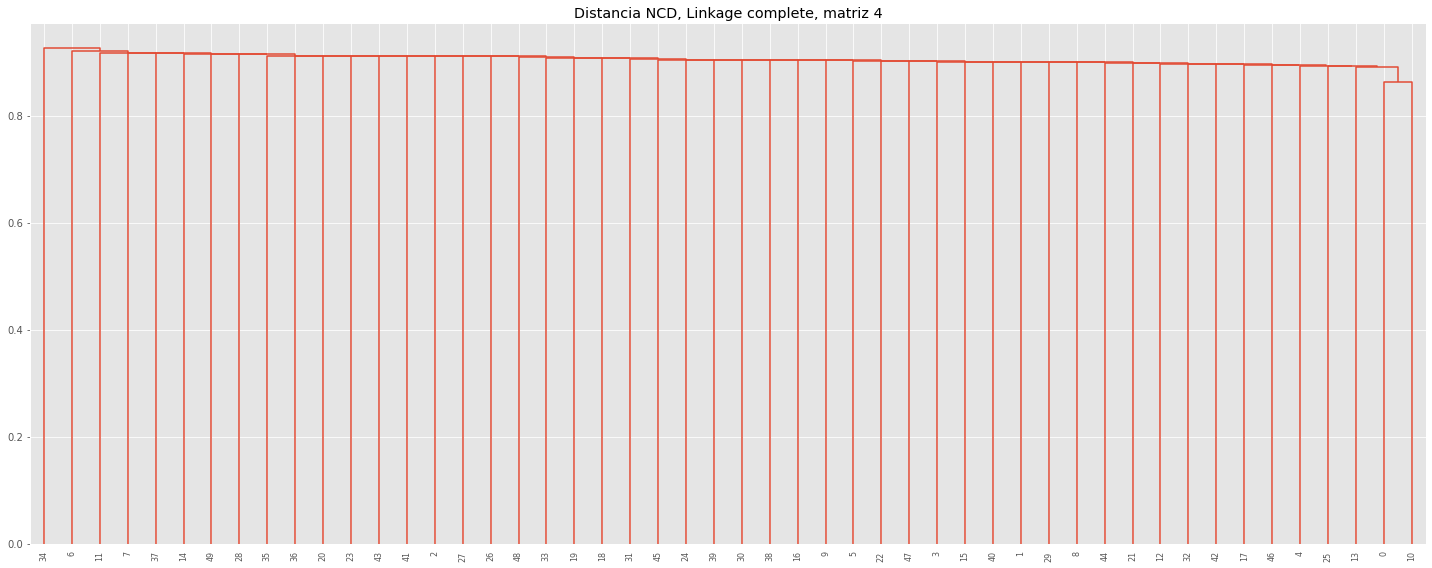

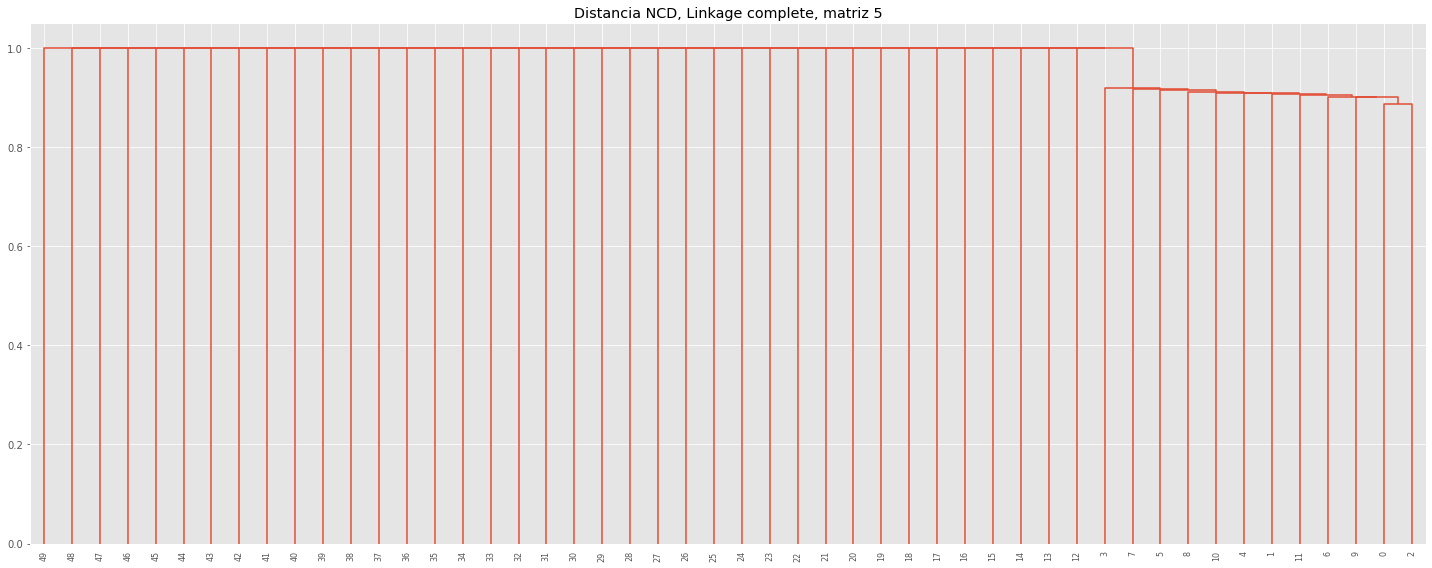

In [11]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Ficheros donde guardar los datos si la noticia no es demasiado corta
if indicador_noticia_demasiado_corta == 0:
    # Carpeta raiz de todos los datos
    if not os.path.exists('Noticias/Base de datos'):
        os.mkdir('Noticias/Base de datos')

    # Carpeta segun el numero de dependencias para diferencias segun las noticias con mas dependencias
    if not os.path.exists('Noticias/Base de datos/' + str(contador_dependencias)):
        os.mkdir('Noticias/Base de datos/' + str(contador_dependencias))

    # Carpeta para cada noticia buscada
    if not os.path.exists('Noticias/Base de datos/' + str(contador_dependencias) + '/' + nombre_noticia_buscada):
        os.mkdir('Noticias/Base de datos/' + str(contador_dependencias) + '/' + nombre_noticia_buscada)
    carpeta_noticia_buscada = 'Noticias/Base de datos/' + str(contador_dependencias) + '/' + nombre_noticia_buscada

# Funcion para dibujar graficas
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)
    
# Creo un cluster por cada matriz de distancias
for numero_matriz in range(0,math.ceil(numero_matrices_distancia)):
    print("Cluster de la matriz número " + str(numero_matriz))
    # Modelo utilizado
    # ==============================================================================
    modelo_hclust_complete = AgglomerativeClustering(
                                affinity = 'precomputed',
                                linkage  = 'single',
                                distance_threshold = 0,
                                n_clusters         = None
                            )
    modelo_hclust_complete.fit(X=list_matrices[numero_matriz])

    # Dendrograma
    # ==============================================================================
    fig, figura = plt.subplots(1, 1, figsize=(20,8))
    plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=figura)
    figura.set_title("Distancia NCD, Linkage complete, matriz " + str(numero_matriz))
    plt.tight_layout();
    
    # Guardo los datos
    # ==============================================================================
    # Solo guardo los datos si la noticia no es demasiado corta
    if indicador_noticia_demasiado_corta == 0:
        # Cluster
        nombre_imagen = carpeta_noticia_buscada + "/Cluster " + str(numero_matriz) + ".jpg"
        plt.savefig(nombre_imagen)
        # Matrices de distancia
        # Solo tiene distancias la primera fila y primera columna. Se compara la noticia_buscada con el resto
        nombre_matrices = carpeta_noticia_buscada + "/Matriz " + str(numero_matriz) + ".json"
        with open(nombre_matrices, 'w') as fp:
            json.dump(list_matrices[numero_matriz].tolist(), fp)

        # Lista de posiciones
        # Posicion de la lista = fila en la matriz, la primera fila es de la noticia_buscada
        nombre_posiciones = carpeta_noticia_buscada + "/Posicion " + str(numero_matriz) + ".json"
        with open(nombre_posiciones, 'w') as fp:
            json.dump(list_posiciones[numero_matriz], fp)

    # Indico que noticia corresponde a cada numero en el dendograma
    fila_columna = 0
    for nombre_noticia in list_posiciones[numero_matriz]:
        print(str(fila_columna) + ": " + nombre_noticia)
        fila_columna += 1
    
    print()